In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc
from PIL import Image, ImageColor, ImageDraw, ImageFilter, ImageFont
import colorsys
# Image.MAX_IMAGE_PIXELS = None

In [2]:
import pickle
with open('tmp_two_word.pkl', 'rb') as f:
    data = pickle.load(f)
data = dict(data)

In [82]:
pixelHeight = 1080
pixelWidth = 1920
ppi = 200
wordcloud = WordCloud(width = pixelWidth, 
                      height = pixelHeight, 
                      max_font_size=512, 
                      min_font_size=100,
                      max_words=30, 
                      background_color="white",
                      font_path='data/msyh.ttf',
                      prefer_horizontal=1,
                      scale = 1,
                      colormap='winter')
wordcloud.generate_from_frequencies(data, max_font_size=200, min_font_size=150)
image = wordcloud.to_image()
# wordcloud.generate(text)

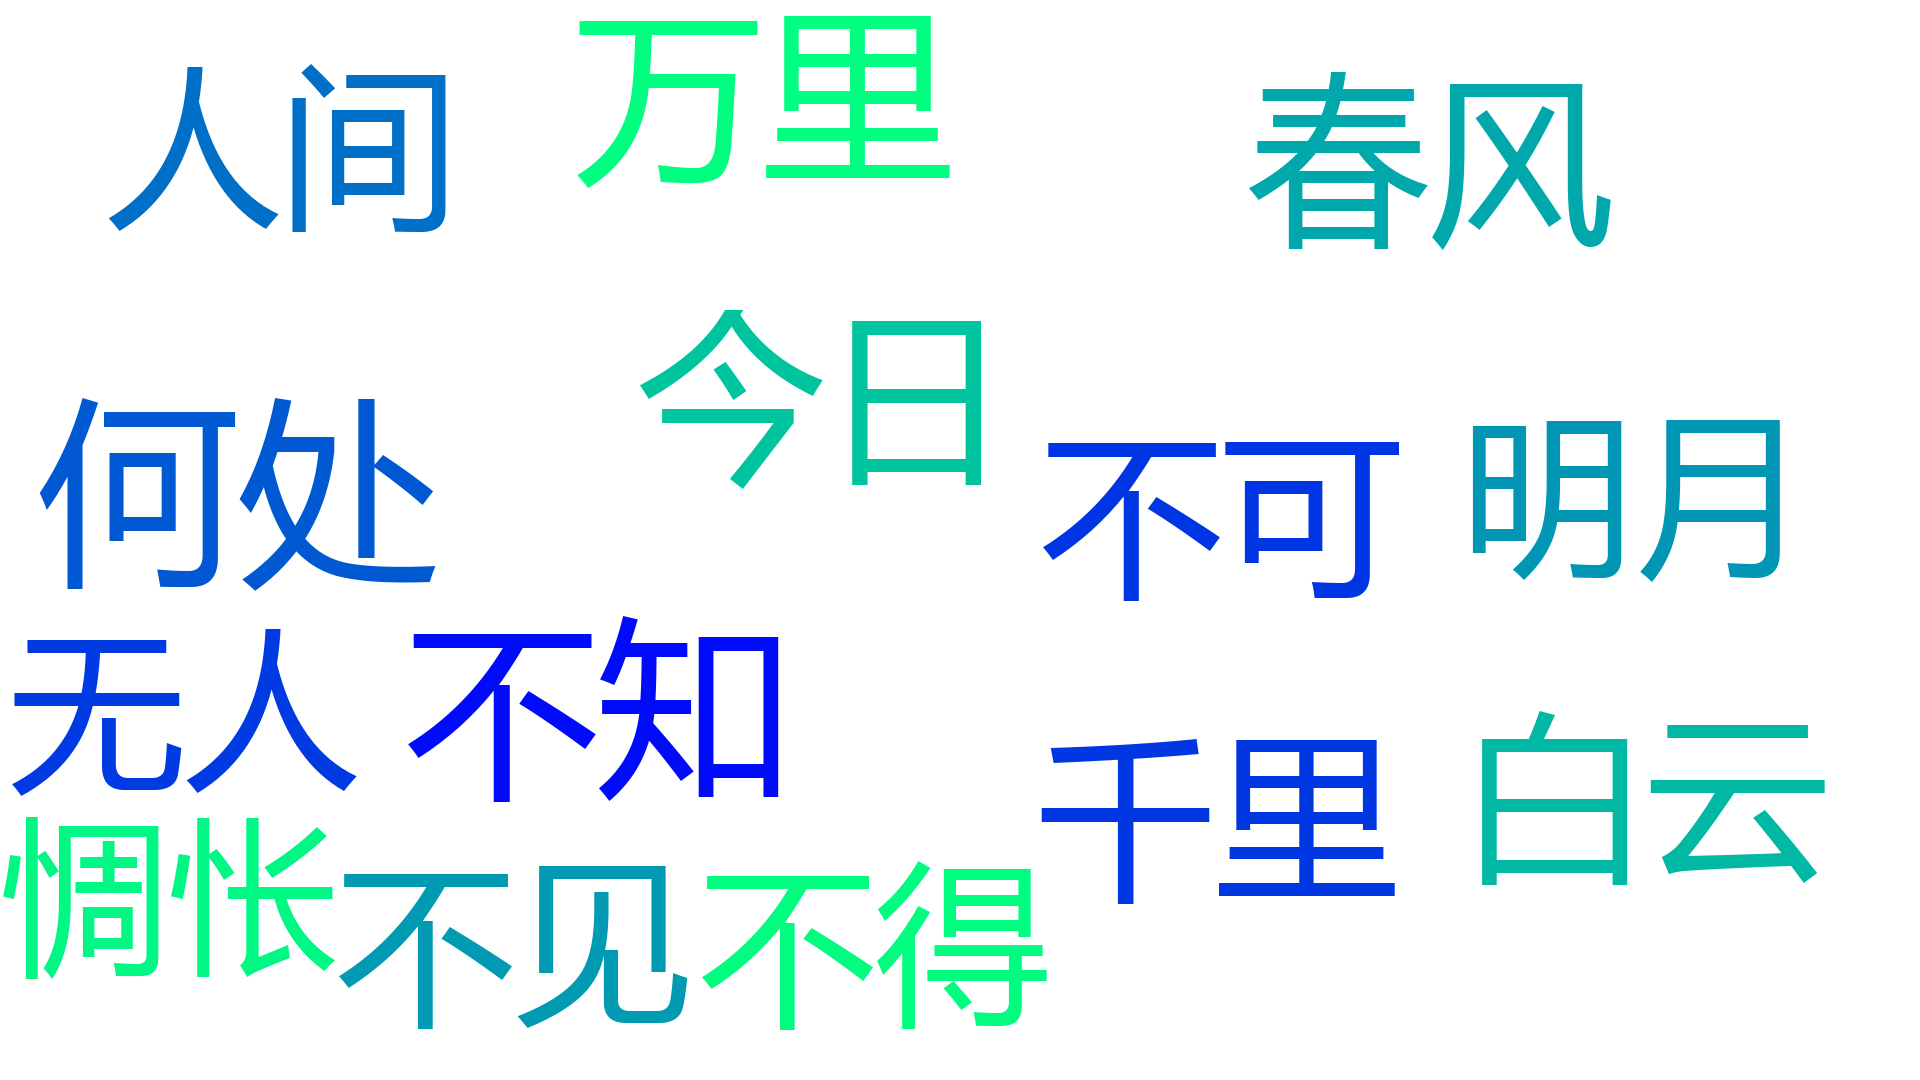

In [83]:
image = wordcloud.to_image()
#image.save('tmp.png')
image

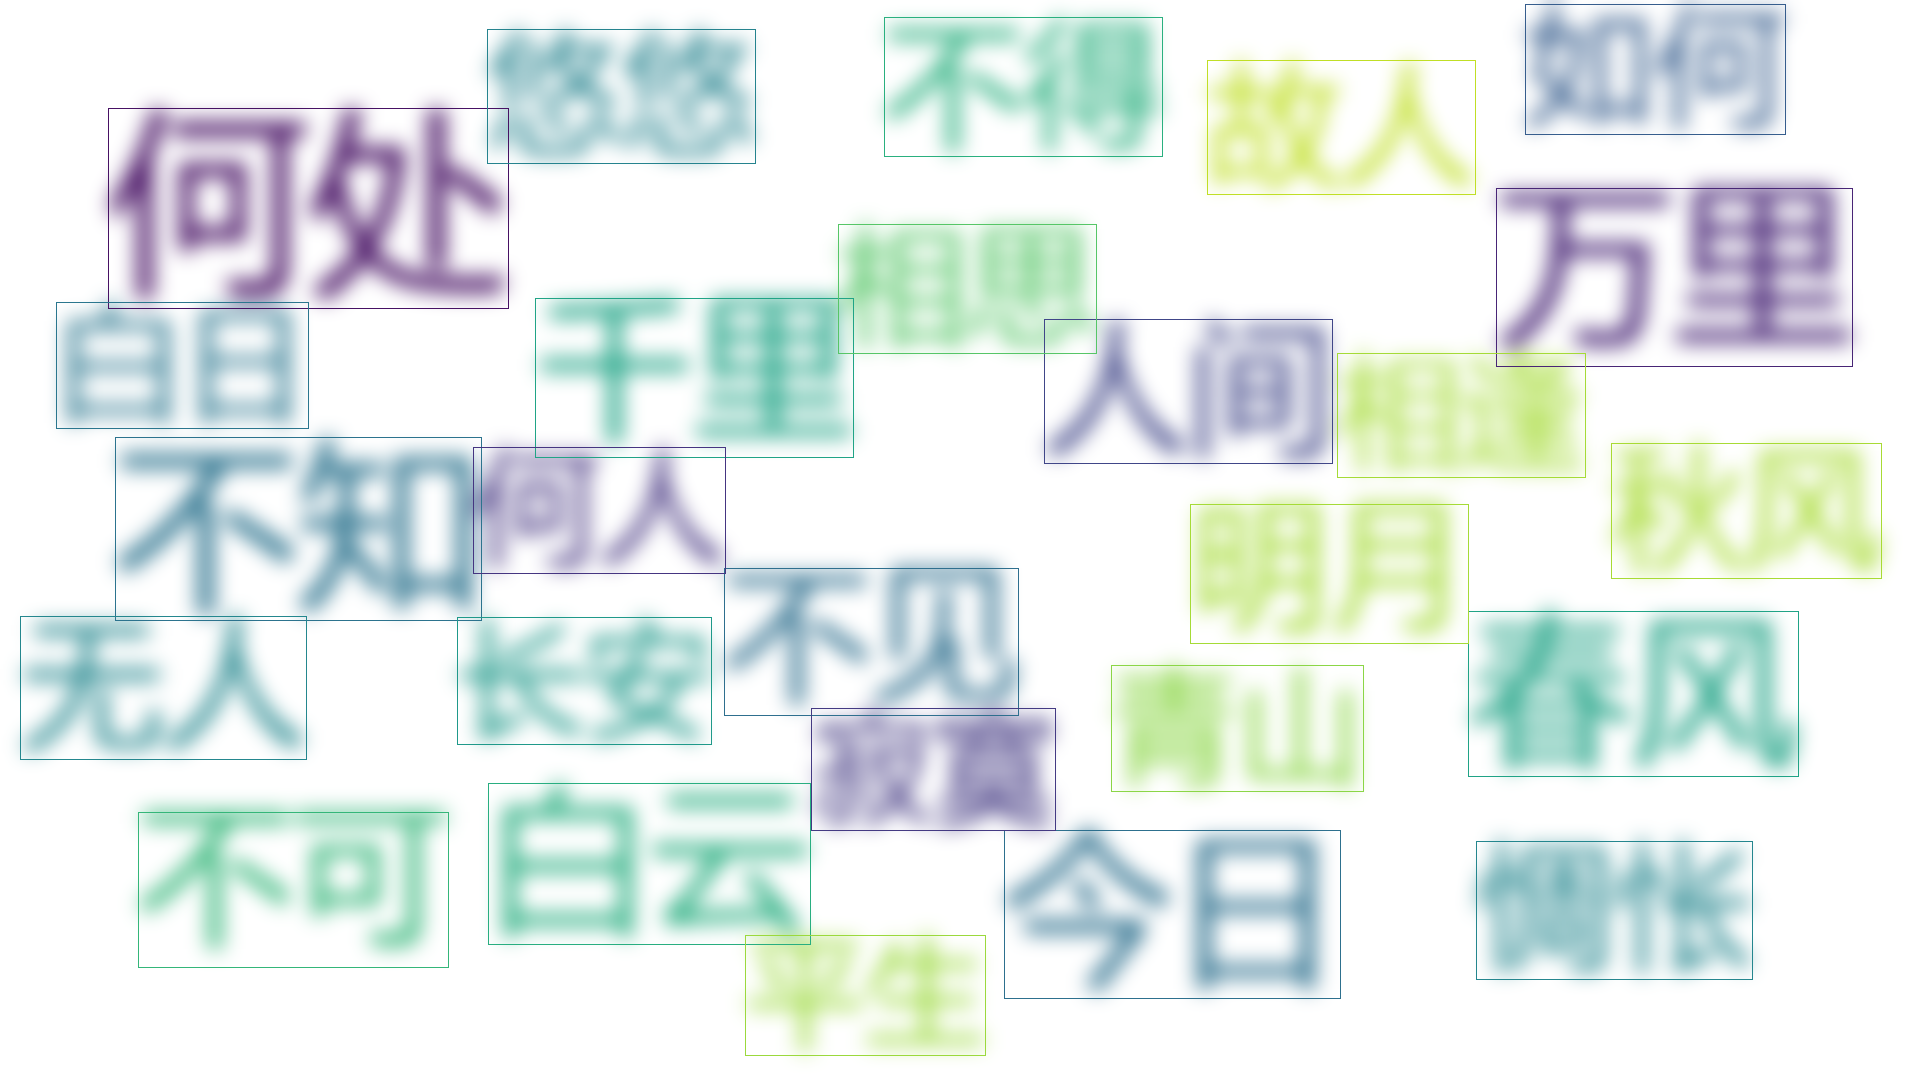

In [49]:
def drawBox(layout, canvas, scale=1):
    draw = ImageDraw.Draw(canvas)
    for (word, count), font_size, (y, x), (width, height), orientation, color in layout:
        x *= scale
        y *= scale
        width *= scale
        height *= scale
        draw.rectangle(xy=[x,y,x+width,y+font_size], outline=color, width=1)
drawBox(wordcloud.layout_, filtered_image)
filtered_image

In [48]:
filtered_image = image.filter(ImageFilter.GaussianBlur(radius=10))

In [ ]:
ppi = 200
deviceHeight = 9
deviceWidth = 12
def showImage(deviceHeight, deviceWidth, figHandler, saveFileName='tmp.jpg', ppi=300):
    plt.figure(figsize=(deviceWidth,deviceHeight))
    plt.imshow(figHandler, interpolation="bilinear")#"bilinear"
    plt.axis("off")
    plt.savefig(saveFileName,ppi=2*ppi)
    plt.show()
showImage(deviceHeight=pixelHeight/ppi, deviceWidth=pixelWidth/ppi, figHandler=wordcloud, ppi=500)

In [66]:
font_path = 'data/msyh.ttf'
def tinyWordle(rpos, box, corpus, basicColor, word, patch):
    width, height = box
    rx, ry = rpos
    canvas = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(canvas)
    canvas
    return canvas

for (word, count), font_size, position, box, orientation, color in wordcloud.layout_:
    x, y = pos
    w, h = box
    canvas = tinyWordle((0,0), (w, h), data, 'red', 'Hello', image.crop((x, y, x+w, y+h)))
    break

In [144]:
class NresWordle:
    def __init__(self, outer_data, inner_data, spec={}, width=1960, height=1080, font_path='data/msyh.ttf',
                 scale=1, outer_max_words=30, outer_max_font_size=300,
                 outer_min_font_size=150, inner_max_font_size=30,
                 inner_min_font_size=8, ppi=200, background_color="white", blend_alpha=0.3):
        self.width = width
        self.height = height
        self.outer_data = outer_data
        self.inner_data = inner_data
        self.dilate_size = outer_max_font_size / 30
        self.erode_size = 10
        self.inner_max_font_size = inner_max_font_size
        self.inner_min_font_size = inner_min_font_size
        self.outer_max_font_size = outer_max_font_size
        self.outer_min_font_size = outer_min_font_size
        self.background_color = background_color
        self.font_path = font_path
        self.blend_alpha = blend_alpha
        self.scale = 1
        self.wordcloud = WordCloud(width=width,
                                   height=height,
                                   max_font_size=outer_max_font_size,
                                   min_font_size=outer_min_font_size,
                                   max_words=outer_max_words,
                                   background_color=background_color,
                                   font_path=font_path,
                                   prefer_horizontal=1,
                                   scale=1,
                                   colormap='winter')
        return
    
    def generate(self):
        self.generateLargeWordle()
        self.inner_img = self.tmpTiny()
        final = self.blendWordle()
        return final

    def tmpTiny(self):
        img_arr = np.array(self.outer_img.convert('L'))
        dilate_image_arr = ndimage.minimum_filter(img_arr, size=self.dilate_size)
        erode_image_arr = ndimage.maximum_filter(img_arr, size=self.erode_size)
        self.context_wordcloud = WordCloud(
            width=self.width,
            height=self.height,
            max_font_size=self.inner_max_font_size,
            min_font_size=self.inner_min_font_size,
            max_words=800,
            background_color=self.background_color,
            font_path=self.font_path,
            prefer_horizontal=1,
            repeat=True,
            mask=np.uint8(dilate_image_arr),
            scale=1)
        self.context_wordcloud.generate_from_frequencies(data, max_font_size=30, min_font_size=4)
        return self.context_wordcloud.to_image()

    def generateLargeWordle(self):
        self.wordcloud.generate_from_frequencies(
            self.outer_data,
            max_font_size=self.outer_max_font_size,
            min_font_size=self.outer_min_font_size)
        self.outer_img = self.wordcloud.to_image()
        self.wordle = self.wordcloud.layout_
        return
    
    def parallelTinyWordle(self):
        return
    
    def generateTinyWordle(self):
        return


    def tinyWordle(self, rpos, box, corpus, basicColor, word, patch):
        width, height = box
        rx, ry = rpos
        canvas = Image.new('RGB', (width, height), 'white')
        draw = ImageDraw.Draw(canvas)

        return canvas
    
    def plotLayoutToCanvas(self, layout, canvas, box=False):
        draw = ImageDraw.Draw(canvas)
        font = ImageFont.truetype(self.font_path,
                                      int(font_size * self.scale))
        for (word, count), font_size, position, box, orientation, color in layout:
            y, x = position
            w, h = box
            draw.text((x*self.scale, y*self.scale), word, fill=color, font=font)
            if box:
                draw.rectangle(xy=[x,y,x+w,y+font_size], outline=color, width=1)
        return canvas

    def blendWordle(self, blend_alpha=None):
        if blend_alpha== None:
            blend_alpha = self.blend_alpha
        filtered_image = self.outer_img.filter(ImageFilter.GaussianBlur(radius=10))
        overview = filtered_image.convert("RGBA")
        detail = self.inner_img.convert("RGBA")
        result = Image.blend(overview, detail, alpha=blend_alpha)
        return result

In [6]:
colorsys.rgb_to_hls(255, 255, 255)

(0.0, 255.0, 0.0)

In [38]:
canvas = Image.new('RGB', (30, 30), 'white')
draw = ImageDraw.Draw(canvas)
font = ImageFont.truetype('data/msyh.ttf',22)
draw.text((0, 0), '好', fill='black', font=font)
canvas

In [145]:
wordle = NresWordle(data, data)
img = wordle.generate()

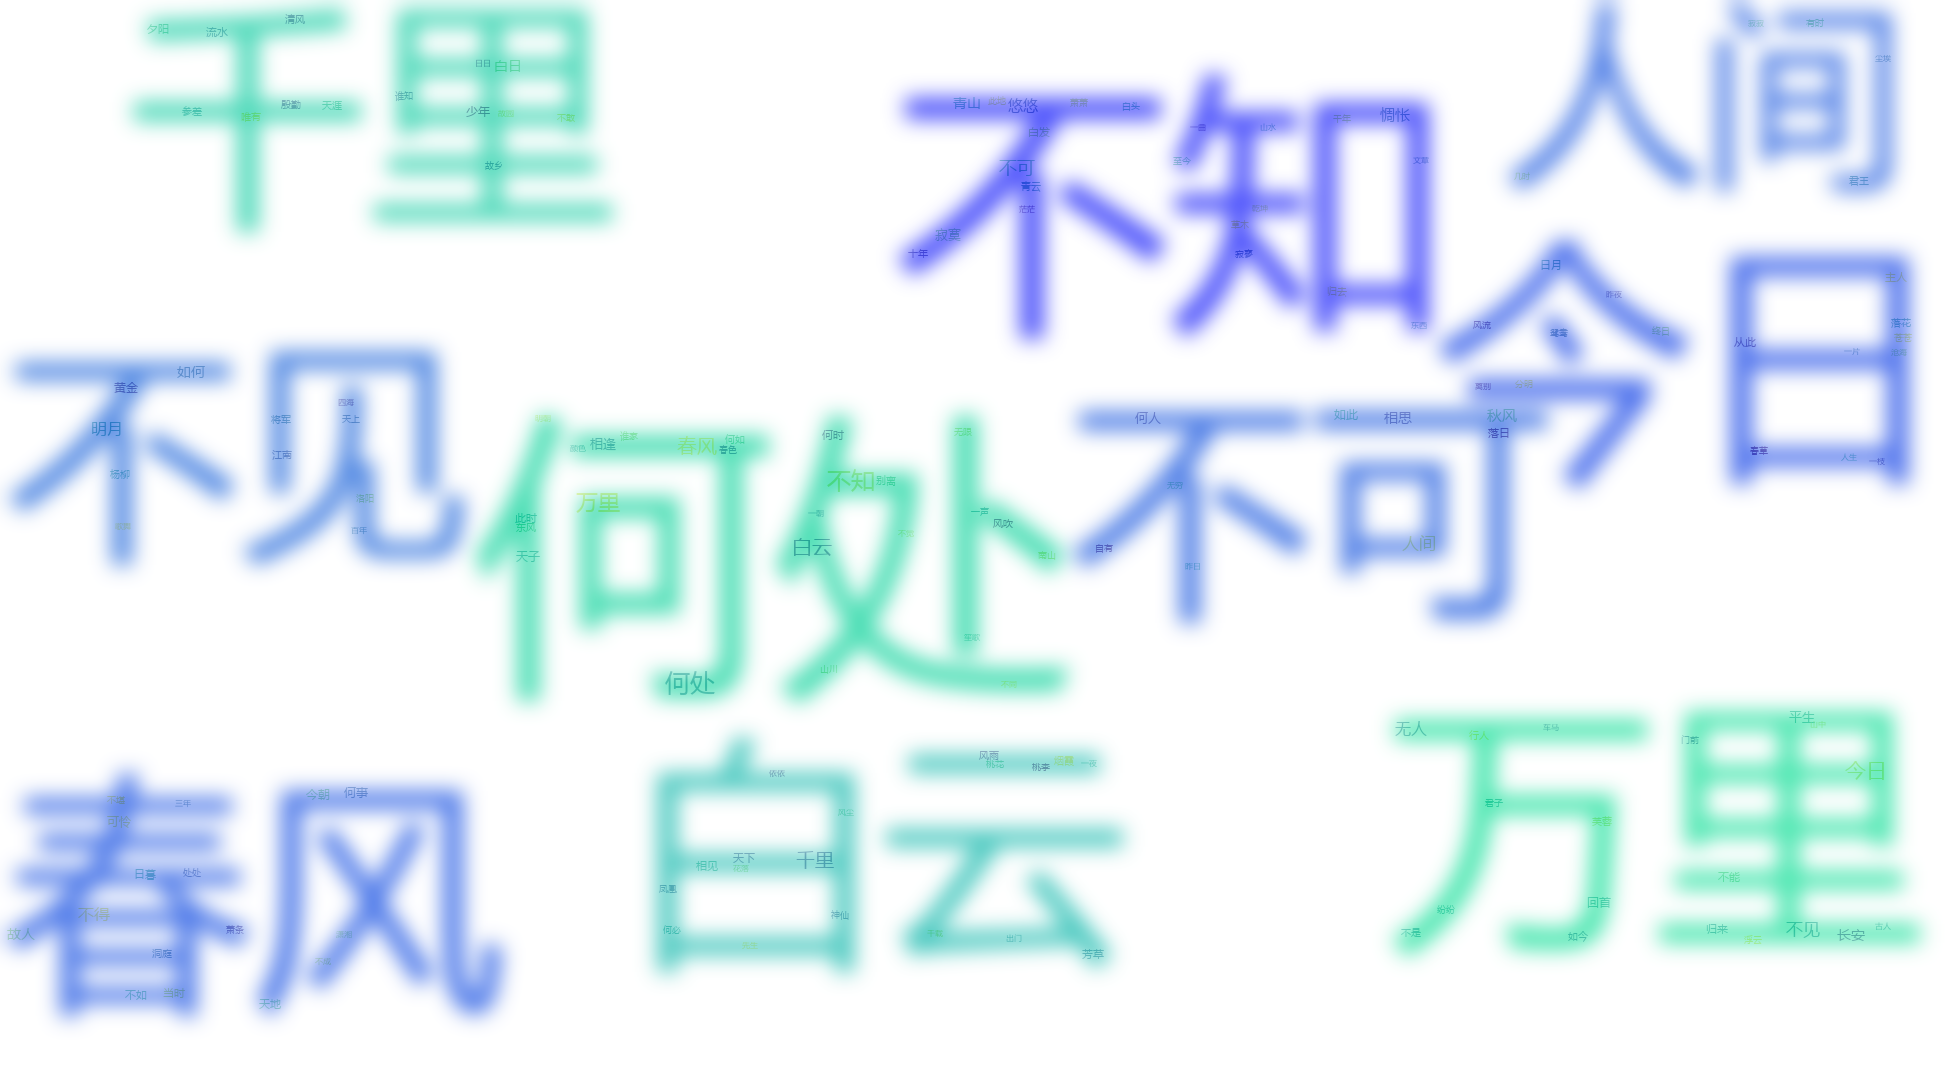

In [146]:
img

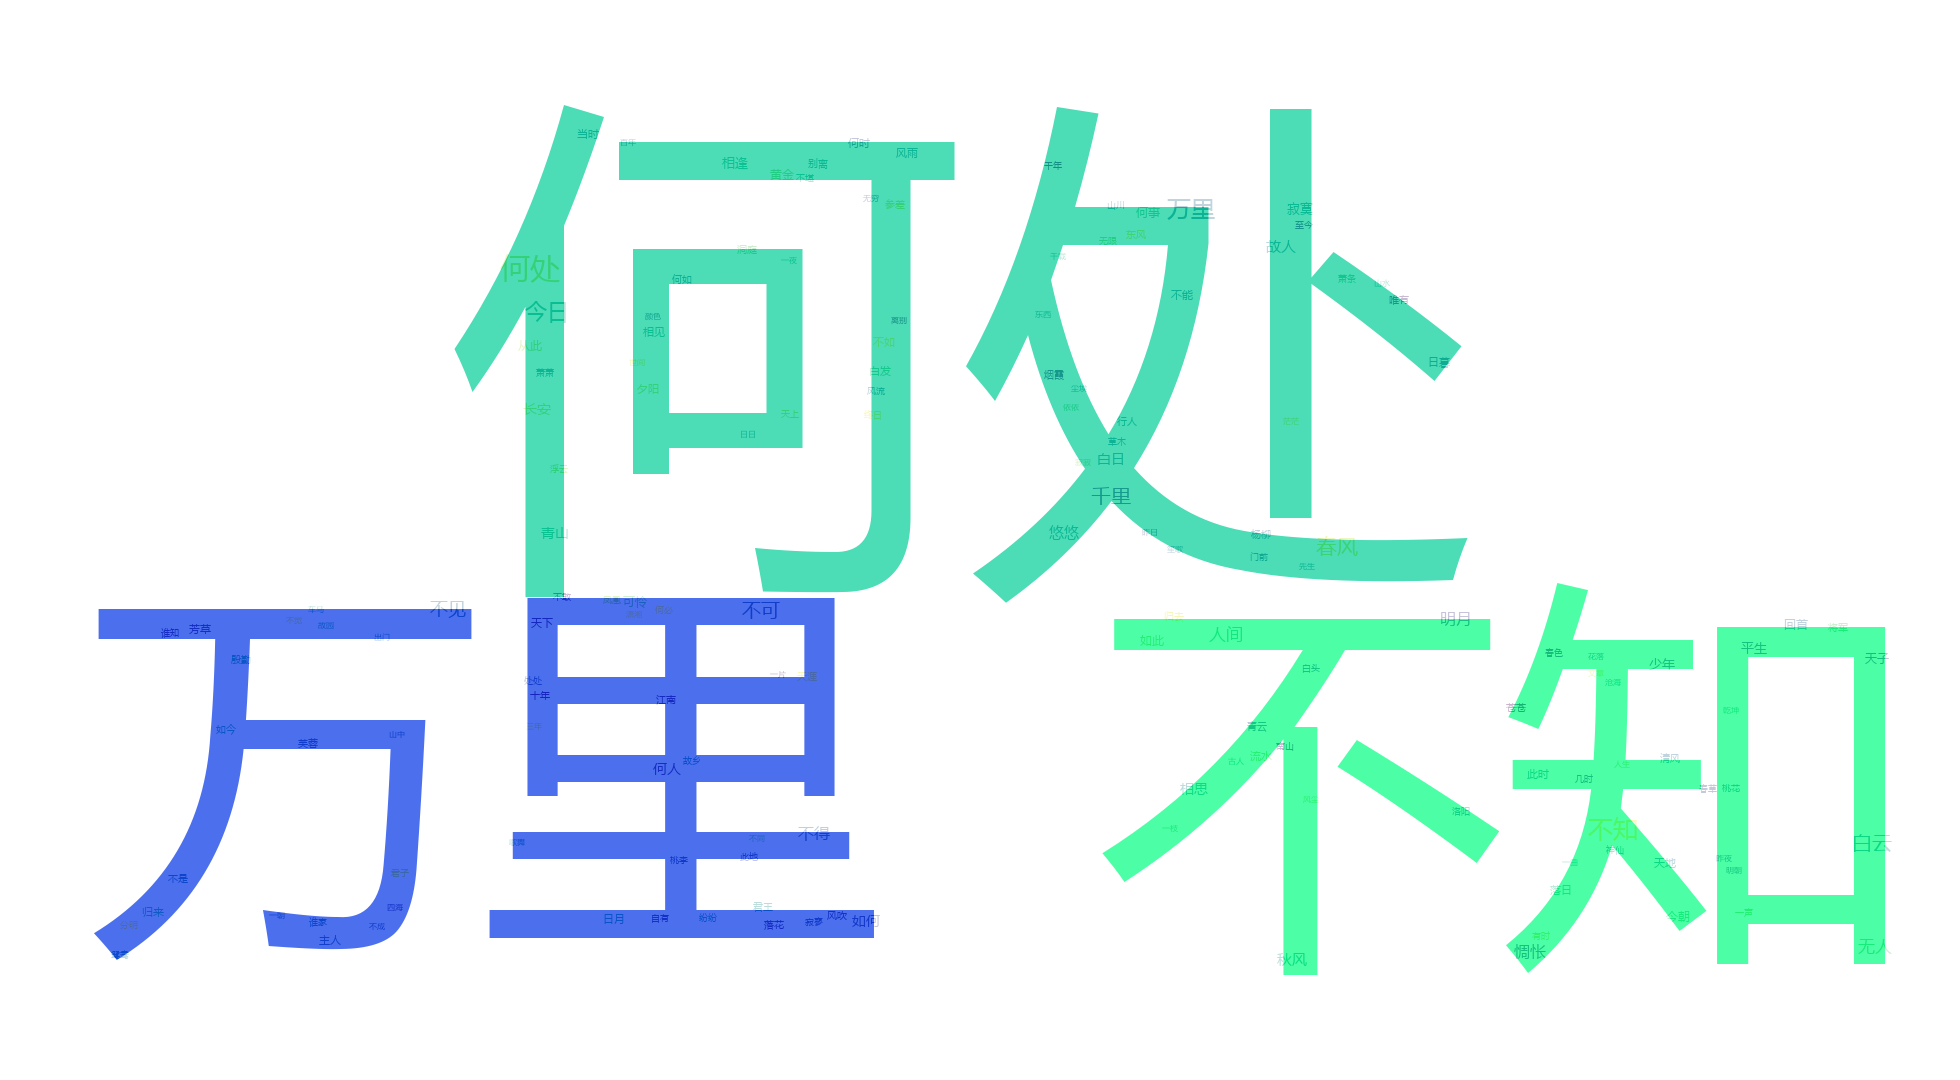

In [138]:
img

In [52]:
pixelHeight = 1080
pixelWidth = 1920
ppi = 200
wordcloud_context = WordCloud(width = pixelWidth, 
                      height = pixelHeight, 
                      max_font_size=40, 
                      min_font_size=4, 
                      background_color="white",
                      font_path='data/msyh.ttf',
                      prefer_horizontal=1,
                      scale = 1)
wordcloud_context.generate_from_frequencies(data)
image_context = wordcloud_context.to_image()

In [30]:
# 高斯高频滤波就是直接原始减去低频
# highpass_kernel = np.array([[-1, -1, -1, -1, -1],
#                    [-1,  1,  2,  1, -1],
#                    [-1,  2,  4,  2, -1],
#                    [-1,  1,  2,  1, -1],
#                    [-1, -1, -1, -1, -1]]).reshape(25)
filtered_context = image_context.filter(ImageFilter.Kernel(size=(5,5), kernel=highpass_kernel))

In [90]:
data

{'何处': 1637,
 '不知': 1363,
 '万里': 1291,
 '今日': 1149,
 '春风': 1113,
 '白云': 1063,
 '千里': 1039,
 '不可': 985,
 '不见': 883,
 '人间': 851,
 '无人': 839,
 '明月': 788,
 '不得': 787,
 '惆怅': 778,
 '秋风': 740,
 '悠悠': 734,
 '故人': 734,
 '如何': 688,
 '相思': 675,
 '长安': 659,
 '青山': 648,
 '白日': 644,
 '何人': 639,
 '相逢': 615,
 '寂寞': 592,
 '平生': 572,
 '少年': 571,
 '黄金': 566,
 '何事': 558,
 '可怜': 535,
 '天子': 529,
 '回首': 523,
 '如此': 511,
 '今朝': 508,
 '从此': 505,
 '天地': 498,
 '主人': 494,
 '不能': 481,
 '流水': 480,
 '此时': 477,
 '落日': 472,
 '不如': 472,
 '归来': 472,
 '日月': 469,
 '芳草': 467,
 '相见': 467,
 '何时': 466,
 '夕阳': 466,
 '当时': 460,
 '天下': 453,
 '白发': 453,
 '日暮': 451,
 '风雨': 444,
 '东风': 437,
 '将军': 436,
 '行人': 435,
 '参差': 434,
 '别离': 434,
 '十年': 421,
 '烟霞': 417,
 '不是': 417,
 '洞庭': 415,
 '归去': 413,
 '江南': 411,
 '唯有': 408,
 '风吹': 407,
 '天涯': 406,
 '杨柳': 400,
 '清风': 398,
 '青云': 397,
 '落花': 392,
 '何如': 387,
 '君王': 387,
 '芙蓉': 384,
 '殷勤': 382,
 '如今': 382,
 '苍苍': 379,
 '桃李': 377,
 '终日': 376,
 '神仙': 373,
 '浮云': 372,
 '此地': 371,
 '白头': 36

In [24]:
def blend_img(context_img, detail_img, w_context=0.01, w_detail=0.9):
    context = context_img.convert("RGBA")
    #context.putalpha(max(1, int(w_context*256)))
    detail = detail_img.convert("RGBA")
    #detail.putalpha(max(1, int(w_detail*256)))
    result = Image.blend(context, detail, alpha=0.3)
    return result


In [31]:
img_arr = np.array(image.convert('L'))

In [36]:
dilate_image_arr = ndimage.minimum_filter(img_arr, size=50)

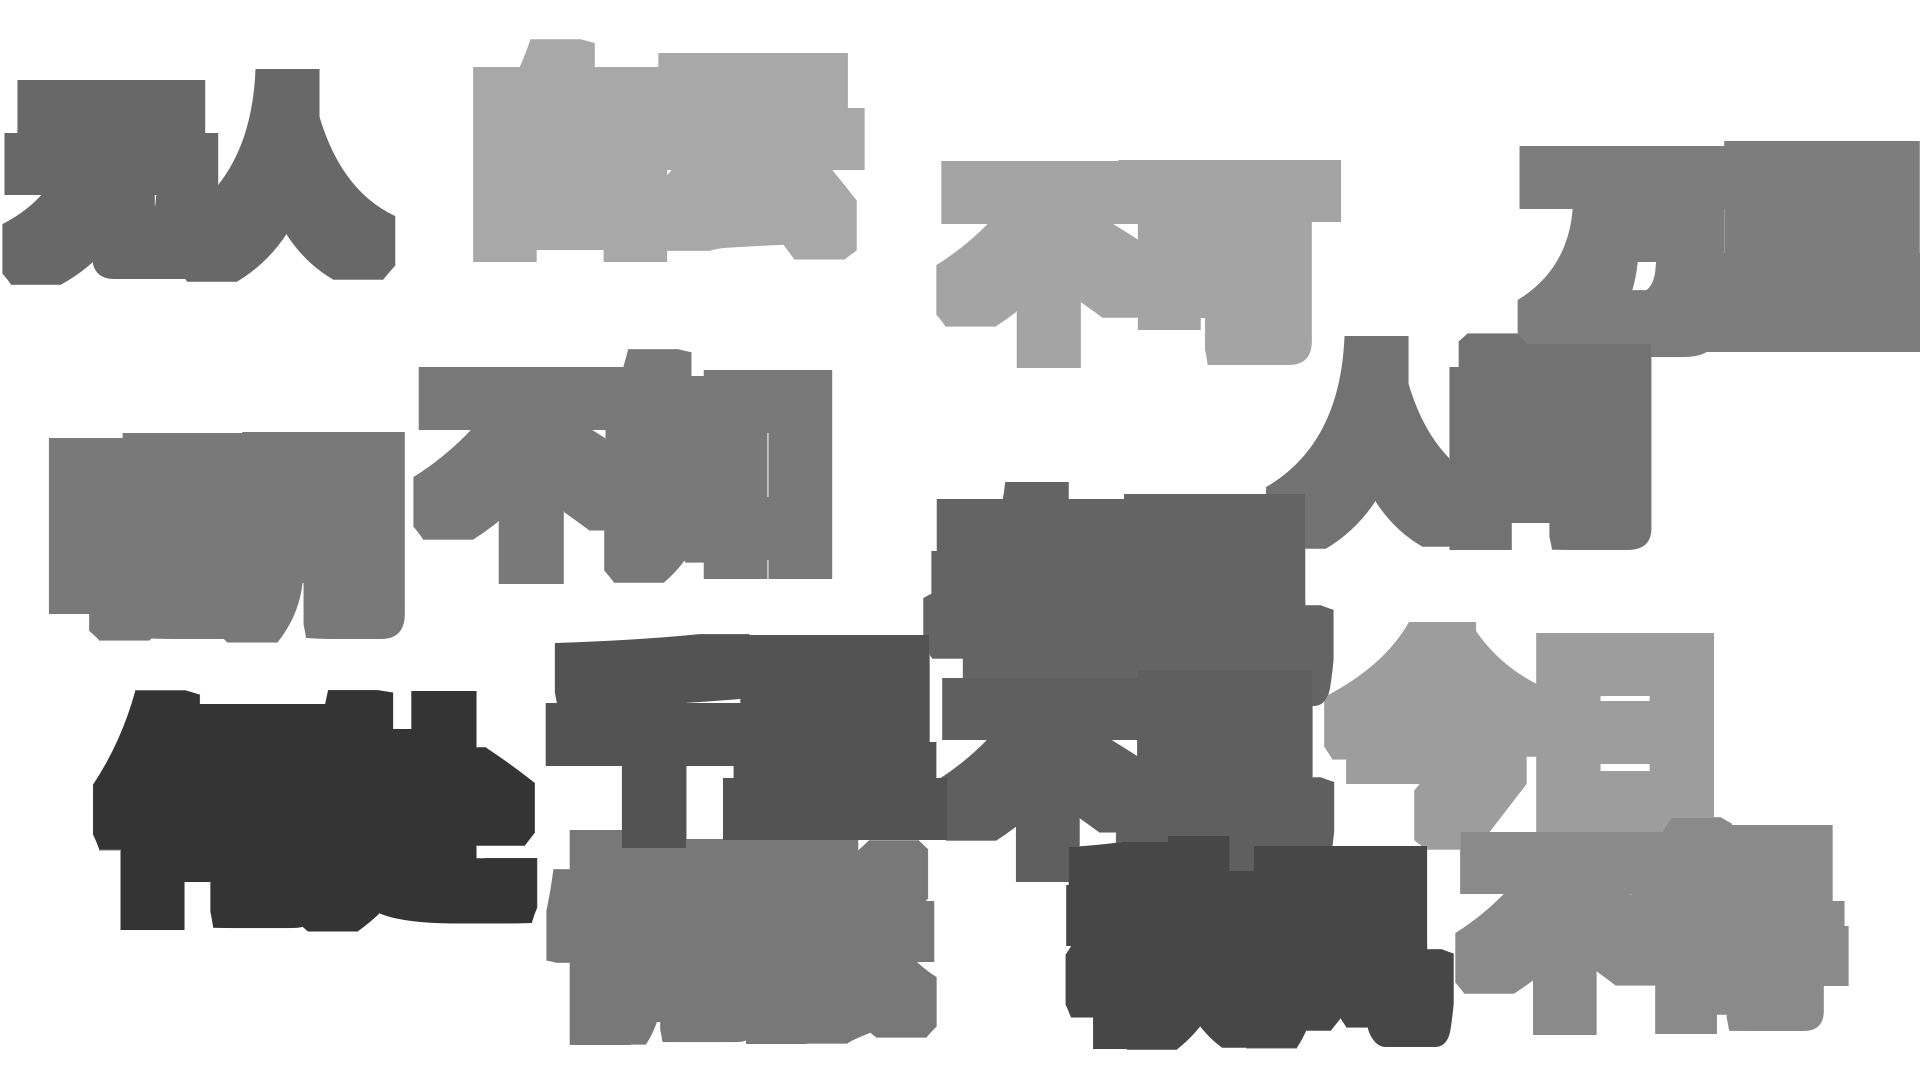

In [37]:
Image.fromarray(np.uint8(dilate_image_arr))

In [31]:
img_arr.shape

(1080, 1920, 3)

In [28]:
context_wordcloud = WordCloud(width = pixelWidth, 
                      height = pixelHeight, 
                      max_font_size=30, 
                      min_font_size=4,
                      max_words=800, 
                      background_color="white",
                      font_path='data/msyh.ttf',
                      prefer_horizontal=1,
                      repeat=True,
                      mask=np.uint8(dilate_image_arr), 
                      scale = 1)
context_wordcloud.generate_from_frequencies(data, max_font_size=30, min_font_size=4)


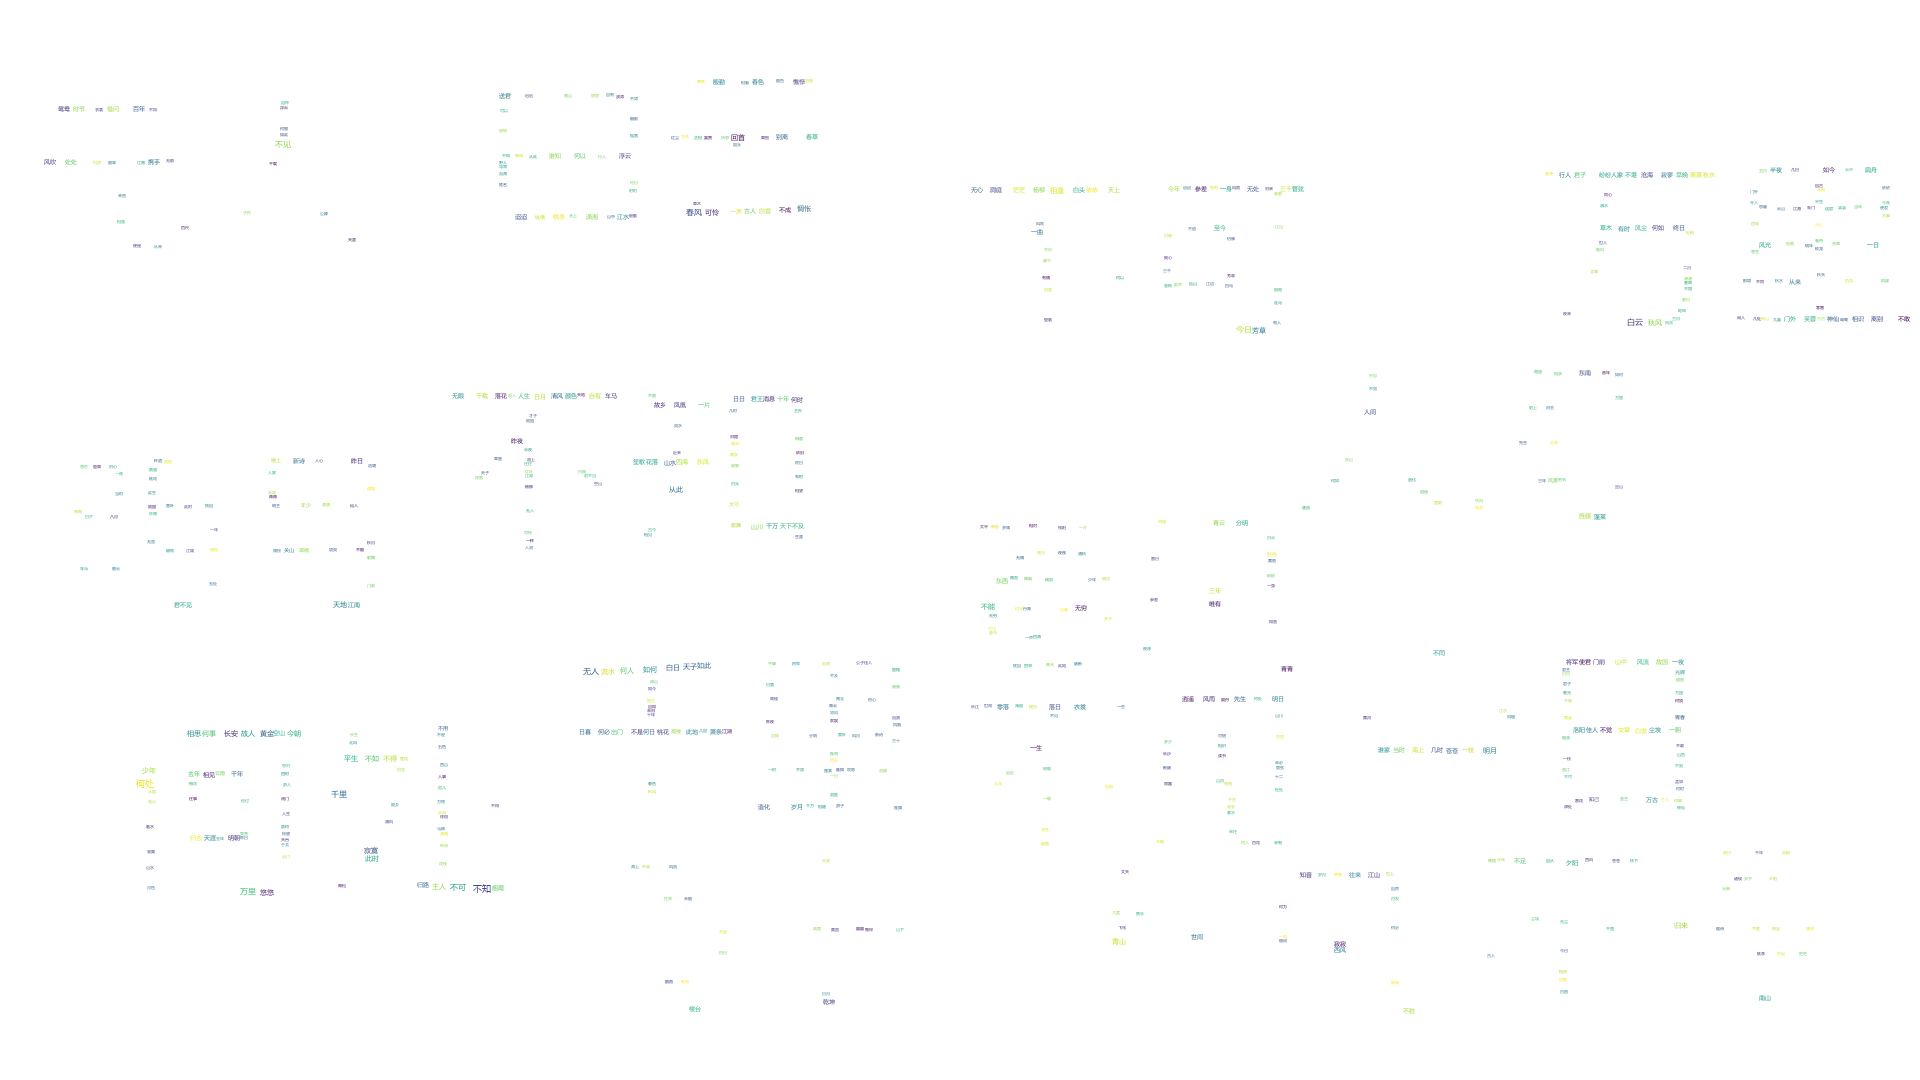

In [29]:
context_image = context_wordcloud.to_image()
context_image

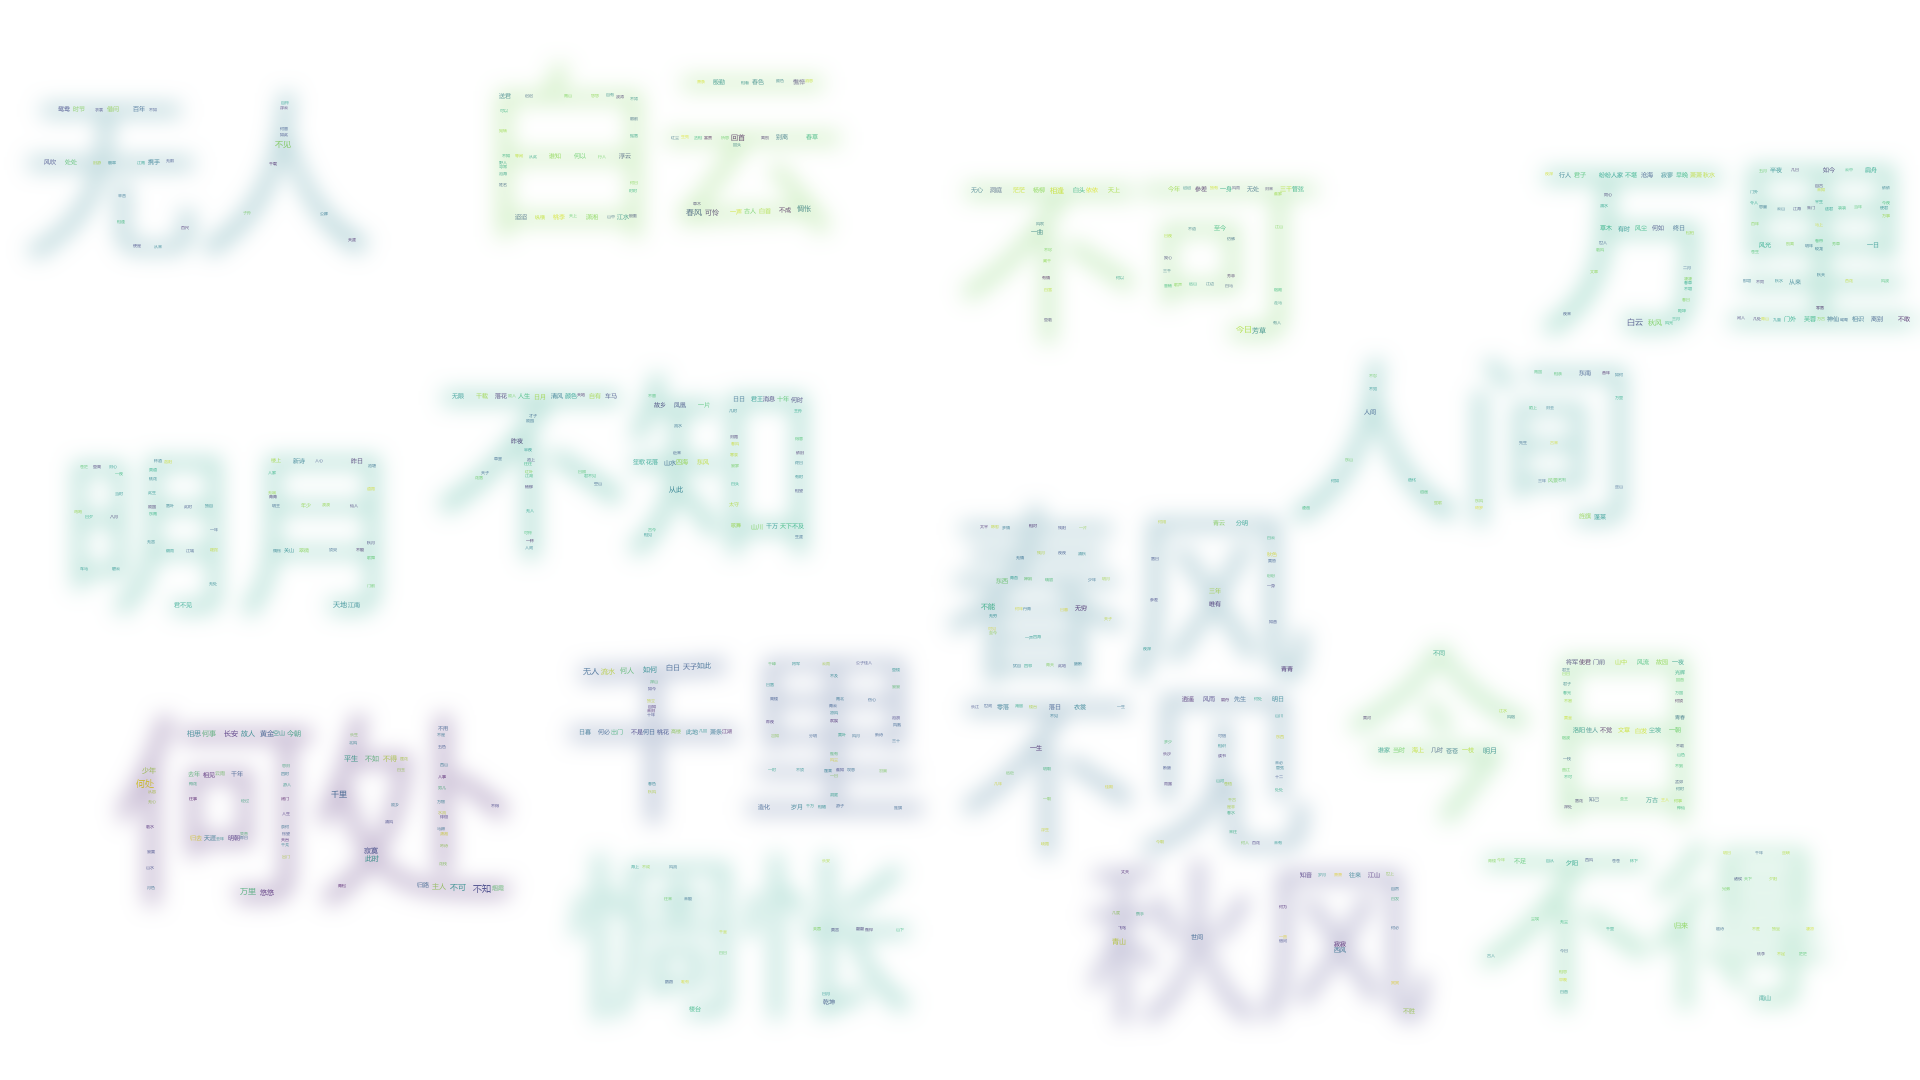

In [30]:
filtered_image = image.filter(ImageFilter.GaussianBlur(radius=10))
blended = blend_img(context_image, filtered_image)
blended

In [62]:
img_arr.shape

(1080, 1920)